## Biblioteca

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns


## Descrição dos dados

In [2]:
df = pd.read_csv("../../data/raw/Melbourne_housing_FULL.csv")

In [3]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

- Suburb: Bairro
- Address: Endereço
- Rooms: Quartos
- Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.
- Price: Preço em dólares
- Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.
- SellerG: Corretor imobiliário
- Date: data vendida
- Distance: Distância até o C.B.D de Melbourne
- Postcode: CEP
- Bedroom2: 
- Bathroom:
- Car: Nº de garagem
- Landsize: Área do lote
- BuildingArea: Área construída
- YearBuilt: Ano em que foi construído
- CouncilArea: Conselho Tutelar(?)
- Lattitude: Latitude
- Longtitude: Longitude
- Regionname: Zonas (Leste, Oeste, Norte, Sul, etc.)
- Propertycount: Nº de propriedades que existem no bairro

Amostra dos dados

In [4]:
df.sample(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
30041,Ashburton,11 Duke St,5,h,1930000.0,S,J,9/12/2017,10.2,3147.0,...,3.0,1.0,672.0,NaN,NaN,Boroondara City Council,-37.86073,145.07758,Southern Metropolitan,3052.0
33442,Ivanhoe,3/61 Beatty St,2,u,730000.0,S,Miles,17/03/2018,7.8,3079.0,...,NaN,NaN,NaN,NaN,NaN,Banyule City Council,NaN,NaN,Eastern Metropolitan,5549.0
11711,Ormond,16 Sherwood St,3,h,1535000.0,S,Marshall,15/10/2016,11.8,3204.0,...,1.0,2.0,578.0,140.0,1935.0,Glen Eira City Council,-37.90470,145.02740,Southern Metropolitan,3578.0
25033,Eltham,6 Lamorna Ct,5,h,1020000.0,S,Jellis,21/10/2017,18.0,3095.0,...,NaN,NaN,NaN,NaN,NaN,Banyule City Council,NaN,NaN,Eastern Metropolitan,6990.0
22733,Richmond,17/9 Tennyson St,2,u,702000.0,S,Dingle,23/09/2017,2.4,3121.0,...,1.0,1.0,NaN,77.0,2004.0,Yarra City Council,-37.82399,144.99181,Northern Metropolitan,14949.0


Algumas informações como completude e tipo de coluna

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

Estatísticas básicas de variáveis numéricas

In [6]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


Completude dos dados (dados faltantes)

In [7]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

## Preprocessamento

### Lidando com dados faltantes

Vamos listar as colunas onde há pelo menos 1 missing value

In [8]:
df.columns[df.isnull().any()]

Index(['Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

No caso dos preços, vamos simplesmente tirar as observações.

Filtrando as observações com os preços faltantes.

In [9]:
df_clean = df[~df['Price'].isnull()]

Vamos investigar as outras observações faltantes:

In [10]:
df_clean[df_clean['Distance'].isnull()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
29483,Fawkner Lot,1/3 Brian St,3,h,616000.0,SP,Brad,6/01/2018,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


A variável 'Distance' é dada pela distância em km entre o lugar onde se encontra a casa/apt até o CBD (central business district) de Melbourne

In [11]:
df_clean.groupby(['Suburb', 'Distance']).agg({'Distance': 'count'})

Distance
Suburb       Distance          
Abbotsford   2.5             61
             3.0             41
Aberfeldie   7.5             35
             9.1             35
Airport West 10.4            78
...                         ...
Yarra Glen   31.4             1
Yarraville   6.3            111
             7.0            139
croydon      23.0             1
viewbank     8.9              1

[484 rows x 1 columns]

Distância até C.B.D. de Melbourne não deve ser tão diferente para cada bairro. Logo vou preencher com a média da distância data pelo bairro.

In [12]:
df_clean[df_clean['Suburb'] == 'Fawkner Lot']

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
29483,Fawkner Lot,1/3 Brian St,3,h,616000.0,SP,Brad,6/01/2018,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Como não existe nenhuma outra observação como referência, poderíamos procurar no google. O nome 'Lot' me deixou curioso se não é apenas erro na digitação. Vamos filtrar por apenas 'Fawkner'

In [13]:
df_clean[df_clean['Suburb'] == 'Fawkner']

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
11225,Fawkner,3 Lovely St,3,h,670000.0,S,YPA,3/12/2016,12.4,3060.0,...,1.0,3.0,587.0,136.0,NaN,Hume City Council,-37.70070,144.96320,Northern Metropolitan,5070.0
11227,Fawkner,220 McBryde St,3,h,645000.0,SP,YPA,4/02/2016,12.4,3060.0,...,1.0,4.0,661.0,NaN,NaN,Hume City Council,-37.70090,144.97760,Northern Metropolitan,5070.0
11228,Fawkner,73 Argyle St,3,h,687000.0,S,YPA,4/03/2017,12.4,3060.0,...,1.0,0.0,684.0,NaN,NaN,Hume City Council,-37.71740,144.96640,Northern Metropolitan,5070.0
11229,Fawkner,1/71 Lynch Rd,2,u,333000.0,SP,hockingstuart,4/03/2017,12.4,3060.0,...,1.0,1.0,97.0,79.0,1970.0,Hume City Council,-37.71180,144.96890,Northern Metropolitan,5070.0
11230,Fawkner,2A Piper St,3,t,455000.0,S,Brad,4/03/2017,12.4,3060.0,...,2.0,1.0,738.0,138.0,2010.0,Hume City Council,-37.71090,144.96540,Northern Metropolitan,5070.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33328,Fawkner,42 Tucker St,4,h,945000.0,S,HAR,17/03/2018,13.1,3060.0,...,2.0,6.0,652.0,166.0,1970.0,Hume City Council,-37.70811,144.96968,Northern Metropolitan,5070.0
34241,Fawkner,69 Marlborough St,4,h,879500.0,PI,Raine,24/02/2018,13.1,3060.0,...,1.0,2.0,690.0,NaN,1950.0,Hume City Council,-37.71829,144.96605,Northern Metropolitan,5070.0
34242,Fawkner,25 William St,3,h,728000.0,S,Ray,24/02/2018,13.1,3060.0,...,1.0,4.0,584.0,122.0,1960.0,Hume City Council,-37.70428,144.96717,Northern Metropolitan,5070.0
34243,Fawkner,33 Wymlet St,3,h,662500.0,PI,McGrath,24/02/2018,13.1,3060.0,...,1.0,2.0,609.0,NaN,NaN,Hume City Council,-37.71179,144.96594,Northern Metropolitan,5070.0


Isso indica que de fato houve erro na digitação. Vamos preencher então utilizando esses valores como referência. Irei utilizar a mediana para preencher, pois como podemos ver, só temos dois valores.

In [14]:
df_clean[df_clean['Suburb'] == 'Fawkner']['Distance'].unique()

array([12.4, 13.1])

In [16]:
median_value

12.4

In [17]:
idx = df_clean[df_clean['Suburb'] == 'Fawkner Lot'].index.tolist()
median_value = df_clean[df_clean['Suburb'] == 'Fawkner']['Distance'].median()

df_clean.loc[idx, ['Distance']] = median_value

/home/taryll/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


A seguir temos o mesmo problema, então basta preencher com o postcode dado.

In [18]:
df_clean[df_clean['Postcode'].isnull()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
29483,Fawkner Lot,1/3 Brian St,3,h,616000.0,SP,Brad,6/01/2018,12.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df_clean[df_clean['Suburb'] == 'Fawkner']['Postcode'].unique()

array([3060.])

In [20]:
idx = df_clean[df_clean['Suburb'] == 'Fawkner Lot'].index.tolist()
mode_value = df_clean[df_clean['Suburb'] == 'Fawkner']['Postcode'].mode()

df_clean.loc[idx, 'Postcode'] = mode_value[0]

/home/taryll/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Latitude e Longitude tem relação com o bairro ou até mesmo com o endereço, logo irei eliminar as colunas.

In [21]:
df_clean.drop(['Lattitude', 'Longtitude'], axis = 1, inplace = True)

/home/taryll/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


As outras variáveis irei preencher com média para as variáveis numéricas e valores mais frequentes para as variáveis categóricas. Antes disso, irei lidar com outliers e remover do nosso dataframe.

In [22]:
column_num = ['Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt']

In [23]:
z_scores = stats.zscore(df_clean[column_num],
                       nan_policy = 'omit')

abs_z_scores = np.abs(z_scores)

filtered_entries = (abs_z_scores.fillna(0) < 3).all(axis = 1)

df_without_outlier = df_clean[filtered_entries]

Agora que realizamos o procedimento uma vez, vamos preencher os valores com a média

In [24]:
mean_values = df_without_outlier[column_num].mean()
df_without_outlier.loc[:, column_num] = df_without_outlier.loc[:, column_num].fillna(mean_values)

/home/taryll/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1884: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


In [25]:
df_clean = df_without_outlier.copy()

Para CouncilArea, Regionname e Propertycount, vamos investigar melhor

In [26]:
df_clean[df_clean['CouncilArea'].isnull()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
18523,Footscray,2/16 Stafford St,2,u,710000.0,S,Jas,15/07/2017,5.1,3011.0,3.001141,1.550566,1.647909,498.994086,146.924069,1966.563627,NaN,NaN,NaN
26888,Camberwell,2/3 Kingsley St,2,h,825000.0,VB,Jellis,11/11/2017,7.7,3124.0,3.001141,1.550566,1.647909,498.994086,146.924069,1966.563627,NaN,NaN,NaN
29483,Fawkner Lot,1/3 Brian St,3,h,616000.0,SP,Brad,6/01/2018,12.4,3060.0,3.001141,1.550566,1.647909,498.994086,146.924069,1966.563627,NaN,NaN,NaN


In [27]:
df_clean[df_clean['Suburb'] == 'Footscray'].loc[:, ['CouncilArea', 'Regionname', 'Propertycount']].mode()

,CouncilArea,Regionname,Propertycount
0,Maribyrnong City Council,Western Metropolitan,7570.0


In [28]:
df_clean[df_clean['Suburb'] == 'Camberwell'].loc[:, ['CouncilArea', 'Regionname', 'Propertycount']].mode()

,CouncilArea,Regionname,Propertycount
0,Boroondara City Council,Southern Metropolitan,8920.0


In [29]:
df_clean[df_clean['Suburb'] == 'Fawkner'].loc[:, ['CouncilArea', 'Regionname', 'Propertycount']].mode()

,CouncilArea,Regionname,Propertycount
0,Hume City Council,Northern Metropolitan,5070.0


Para todos eles podemos preencher com os valores listados.

In [30]:
df_temp = df_clean[df_clean['CouncilArea'].isnull()]

In [31]:
idx = df_temp[df_temp['Suburb'] == 'Footscray'].index.tolist()
most_freq_values = df_clean[df_clean['Suburb'] == 'Footscray'].loc[:, ['CouncilArea', 'Regionname', 'Propertycount']].mode().to_numpy()

df_clean.loc[idx, ['CouncilArea', 'Regionname', 'Propertycount']] = most_freq_values[0]

In [32]:
idx = df_temp[df_temp['Suburb'] == 'Camberwell'].index.tolist()
most_freq_values = df_clean[df_clean['Suburb'] == 'Camberwell'].loc[:, ['CouncilArea', 'Regionname', 'Propertycount']].mode().to_numpy()

df_clean.loc[idx, ['CouncilArea', 'Regionname', 'Propertycount']] = most_freq_values[0]

In [33]:
idx = df_temp[df_temp['Suburb'] == 'Fawkner Lot'].index.tolist()
most_freq_values = df_clean[df_clean['Suburb'] == 'Fawkner'].loc[:, ['CouncilArea', 'Regionname', 'Propertycount']].mode().to_numpy()

df_clean.loc[idx, ['CouncilArea', 'Regionname', 'Propertycount']] = most_freq_values[0]

In [34]:
df_clean.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Regionname       0
Propertycount    0
dtype: int64

In [35]:
del df_temp, idx

In [36]:
df_clean.to_csv('../../data/processed/df_clean.csv', index = False)

## EDA

Agora que foi feita um primeiro preprocessamento dos dados, vamos levantar algumas hipóteses sobre os dados e tentar responder elas através das análises de dados. Em geral podemos montar tabelas e gráficos para uma melhor visualização dos dados.

Qual a relação das variáveis com o preço das casas?

O vendedor importa na hora de venda ou preço?



In [37]:
df_clean = pd.read_csv('../../data/processed/df_clean.csv')

In [43]:
def scat_plot(x, y, data):
    sns.scatterplot(x = x, y = y, data = df_clean)
    plt.ticklabel_format(style = 'plain', axis = 'y')
    plt.title(x)
    plt.show()

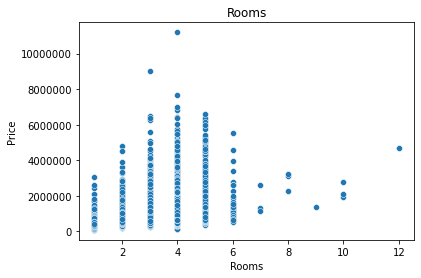

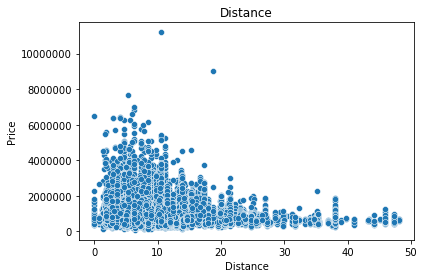

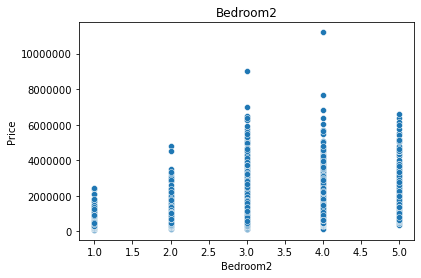

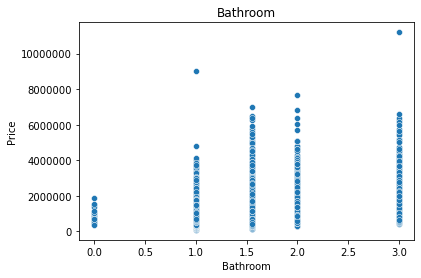

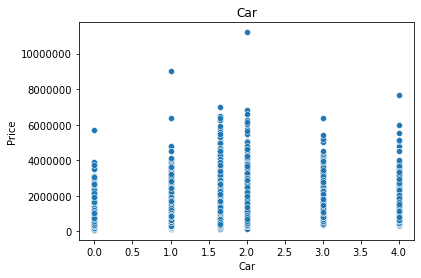

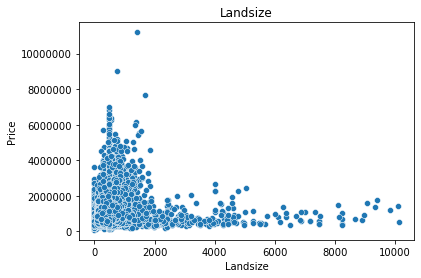

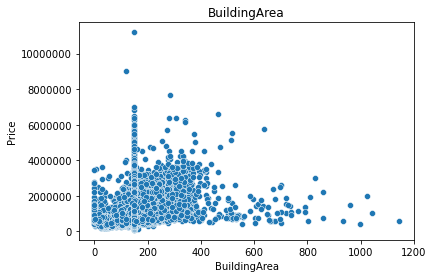

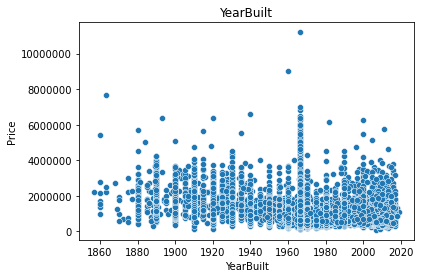

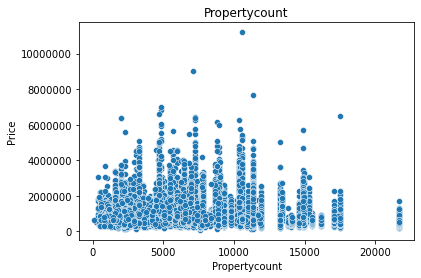

In [44]:
columns = ['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 
           'Landsize', 'BuildingArea', 'YearBuilt', 'Propertycount']

for i in columns:
    scat_plot(i, 'Price', df_clean)

In [69]:
df['Date'] = pd.to_datetime(df['Date'])

In [24]:
df_clean.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,146.924069,1966.563627,Yarra City Council,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.000000,1900.000000,Yarra City Council,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.000000,1900.000000,Yarra City Council,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,146.924069,1966.563627,Yarra City Council,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.000000,2014.000000,Yarra City Council,Northern Metropolitan,4019.0


Vamos criar uma série com o preço de venda das casas. Aqueles que foram vendidas no mesmo dia, vou colocar a mediana do valor para a data.

In [66]:
ts = df_clean.loc[:, ['Date', 'Price']].groupby('Date').median()

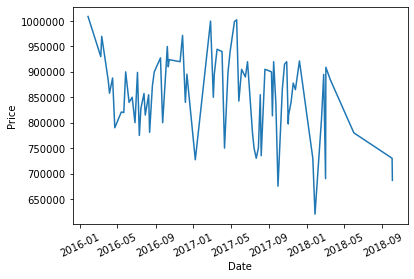

In [67]:
sns.lineplot(x = 'Date', y = 'Price', data = ts)

plt.ticklabel_format(style = 'plain', axis = 'y')

plt.xticks(rotation = 25)

plt.show()

In [33]:
df_clean['Date'] = pd.to_datetime(df_clean['Date'])

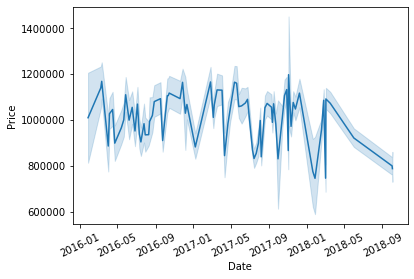

In [41]:
sns.lineplot(x = 'Date', y = 'Price', data = df_clean)

plt.ticklabel_format(style = 'plain', axis = 'y')

plt.xticks(rotation = 25)

plt.show()

<AxesSubplot:xlabel='Date', ylabel='Price'>

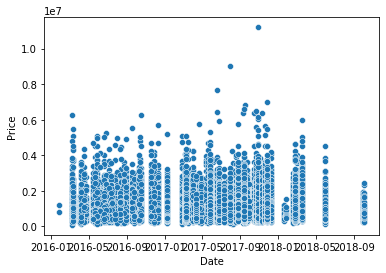

In [55]:
sns.scatterplot(x = 'Date', y = 'Price', data = df_clean)